# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20) 

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

In [22]:
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью
7,0,152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,C,получение образования
8,2,6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью


### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [23]:
test = data.groupby("children")["debt"].agg(["count", "mean"])
test

,count,mean
children,,
0,14091,0.075438
1,4808,0.092346
2,2052,0.094542
3,330,0.081818
4,41,0.097561
5,9,0.000000


In [25]:
import seaborn
seaborn.barplot(x=test['children'], y=test["mean"])

KeyError: 'children'

**Вывод:** проанализировав график зависимости количества детей от возврата кредита в срок, можно увидеть следующее:
      
   **—** Чем больше детей тем меньше показатель по возврату вовремя. Получается, что выгоднее давать кредит людям у кого нет детей, 3 ребенка или 5, так как их процент неуплаты вовремя кредита 8% и неиже. У кого 5 детей задолжностей нет.
      
   **—** Тем у кого нет детей или 1-2 или 4 нерезонно одобрять кредиты, так как их процент по невозврату кредита вовремя около 9%. 
   
     Стоит отметить, что данные показатели все меньше 10% от общего количество заемщиков.  

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [25]:
family_debt_sum= data.groupby('family_status')['debt'].sum() # Кол-во задолжностей(1) по каждой категории в children
family = data.groupby('family_status')['debt'].count() # Кол-во элементов в столбце family_status по каждой категории
family_debt = family_debt_sum / family # Доля задолжников в зависимости от семейного положения
family_unique = data['family_status'].sort_values().unique()
family_debt

family_status
Не женат / не замужем    0.097639
в разводе                0.070648
вдовец / вдова           0.066246
гражданский брак         0.093130
женат / замужем          0.075606
Name: debt, dtype: float64

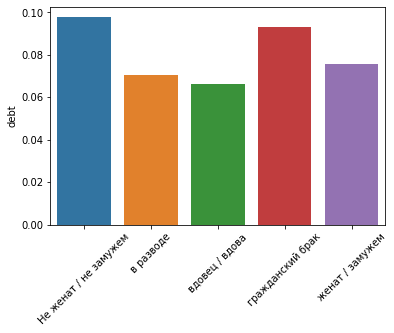

In [26]:
import seaborn
import matplotlib.pyplot as plt
seaborn.barplot(x=family_unique , y=family_debt, data = data)
plt.xticks(rotation=45)
plt.show()

**Вывод:** проанализировав график зависимости семейного положения от возврата кредита в срок, можно увидеть следующее:
      
   **—** Люди со статусом в разводе и вдовец/вдова имеют одни из самых низких показателей по возврату кредита в срок. Это говорит о том, что имея некий бэкграунд люди стараются выплачивать все в сроки и не иметь задалжности хотябы в кредите.  Самый низкий у вдовец/вдова 6,6%.
   
   **—** Статус женат/замужем не сильно отличается от сказанных выше статусов - 7,5% 
      
   **—** Со статусом не женат/не замужем (9,7%) и гражданский брак (9,3%) самые высокие показатели. Получаются люди не побывавшие в официальном браке больше подвержены к неуплате кредита вовремя. 
   
     Стоит отметить, что данные показатели все меньше 10% от общего количество заемщиков. 

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [27]:
category_debt_sum= data.groupby('total_income_category')['debt'].sum() # Кол-во задолжностей(1) по каждой категории в total_income_category
category = data.groupby('total_income_category')['debt'].count() # Кол-во элементов в столбце total_income_category по каждой категории
category_debt = category_debt_sum / category # Доля задолжников в зависимости от уровня дохода
category_unique = data['total_income_category'].sort_values().unique()
category_debt

total_income_category
A    0.080000
B    0.070602
C    0.084982
D    0.060172
E    0.090909
Name: debt, dtype: float64

<AxesSubplot:ylabel='debt'>

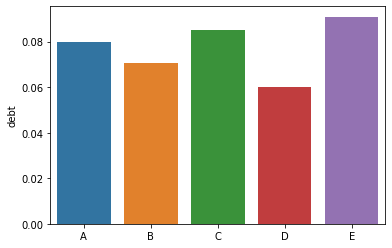

In [28]:
import seaborn

seaborn.barplot(x=category_unique , y=category_debt)



- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

**Вывод:** проанализировав график зависимости уровня доходов от доли неуплаты кредита в срок, можно увидеть следующее:

   **—** Люди из категории Д имеют самый низкий показатель по неуплате кредита (6%). Следовательно с таким уровнем дохода лиди более ответственные и почти всегда платят кредит вовремя.
      
   **—** Люди со средним доходом (категория С) и выше среднего (категории В 7% и А8%) имеют достаточно высокие показатели по неуплате кредита. В категории С - 8,4%. 
      
   **—** Люди с самым низким доходом имеют самые большие показатели по неуплате кредита. В категории Е 9%,  Следовательно люди получающие до 30000 самые не ответственные и чаще всех неуплачивают кредит вовремя, может быть из-за ограниченных ресурсов.  
     
     Стоит отметить, что данные показатели все меньше 10% от общего количество заемщиков. 

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [29]:
purpose_debt_sum= data.groupby('purpose_category')['debt'].sum() # Кол-во задолжностей(1) по каждой категории в purpose_category
purpose = data.groupby('purpose_category')['debt'].count() # Кол-во элементов в столбце purpose_category 
purpose_debt = purpose_debt_sum / purpose # Доля задолжников в зависимости от цели кредита
purpose_unique = data['purpose_category'].sort_values().unique()
purpose_debt

purpose_category
операции с автомобилем      0.093480
операции с недвижимостью    0.072551
получение образования       0.092528
проведение свадьбы          0.079118
Name: debt, dtype: float64

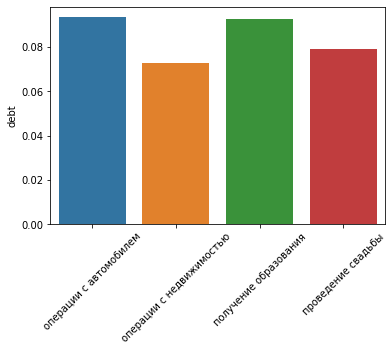

In [30]:
import seaborn
import matplotlib.pyplot as plt
seaborn.barplot(x=purpose_unique , y=purpose_debt, data = data)
plt.xticks(rotation=45)
plt.show()

**Вывод:** проанализировав график зависимости цели кредита от возврата кредита в срок, можно увидеть следующее:
      
   **—** Хуже всего ситуация с кредитом на автомобили и образование. 9% люлей не возвращают кредит вовремя. 
     
   **—** Ситуация с кредитами на свадьбу чуть ниже: около 7,9% людей не закрывают кредит вовремя.
   
   **—** Самый низкий показатель с кредитом на недвижимость, его закрывают лучше всего. 7,2% людей не закрыли кредит вовремя.Но его показатель не сильно отличается от кредита на свадьбу. Скорей всего кредит на недвижимость берут чаще и поэтому чуть мень показатель. 
   
     Стоит отметить, что данные показатели все меньше 10% от общего количество заемщиков. 

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 
1)пользователь не указал о себе какие-нибудь сведения 
2)автоматизированная система сбора информации дала сбой
3)пропуски оставляют умышленно, рассчитывая на автозаполнение спецсимволами

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:*  
Медиана — это такое число в выборке, что ровно половина элементов больше него, а другая половина — меньше. Медианное значению лучше чем среднее значение, так как среднее значение некорректно характеризует данные, когда некоторые значения сильно выделяются среди большинства. С помощью медианног значения мы получаем более объективную информация. 

### Шаг 4: общий вывод.

   В данной работе проводился анализ с данными по статистике о платежеспособности клиентов.Результаты данной работы будут учтены при построении модели кредитного скоринга. 

При работе с данными были выявлены пропуски в столбцах days_employed, total_income. В total_income пропуски были заменены на медианное значетие по каждой категории столбца income_type. В столбце days_employed встретились аномальные значения (отрицательные числа), их мы взяли по модулю. В столбце days_employed пропуски так же заполнили медианными значениями по каждого типа занятости income_type. В столце children - количество детей были устранены аномальные значения: 20, -1. Были удалены строки дублирующие друг друга. 

Был создан новый столбец total_income_category, в нем люди разделены на категории по количеству дохода (по столбцу total_income). Это позволило нам провести зависимость между уровнем дохода и возвратом кредита в срок.
Создали новый столбец purpose_category, в котором так же люди разделены на категории по цели на кредит (столбец purpose), для того чтобы с данными мжно было работать. Это позволило нам узнать как цели кредита влияют на его возврат в срок.
После того как данные были приведены в нуужный вид, были постоены графики по которым можно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. 


Можно сказать точно, что людям с 4 детьми или 2, которые не женаты или незамужем, получающие заработную плату меньше 30000 не желательно одобрять кредит, особенно если он на автомобиль или образование. 

Лучше всего выплачивают кредит многодетные семьис 5 детьми с доходом от 30000 до 200000, особенно если кредит на недвижимость. 
Стоит отметить, что так же следует учитывать историю по кредитам, которая в данном анализе не представлена.(нет данных) 